In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.notebook_repr_html', False)

plt.rcParams['figure.figsize'] = [10, 8]
df = pd.read_csv('kr_population.csv')
df.shape

(97, 6)

In [37]:
df.iloc[:,2]

0     558897
1     511667
2     534524
3     566142
4     566969
       ...  
92    357771
93    326822
94    303054
95    272337
96    260562
Name: birth, Length: 97, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        97 non-null     int64  
 1   population  97 non-null     int64  
 2   birth       97 non-null     int64  
 3   death       97 non-null     int64  
 4   increments  97 non-null     int64  
 5   birthrate   69 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 4.7 KB


In [4]:
df.head()

   Year  population   birth   death  increments  birthrate
0  1925    12997611  558897  359042      199855       6.59
1  1926    13052741  511667  337948      173719        NaN
2  1927    13037169  534524  353818      180706        NaN
3  1928    13105131  566142  357701      208441        NaN
4  1929    13124279  566969  414366      152603        NaN

년도/총 인구수/출생아 수/사망 수/증가 인구수/ 출생율(28개의 결측치)
행(97) 열(6)

1. 출생아 수 및 합계 출산율(막대, 점선)
2. 출생아 수 및 사망 수(산점도)
3. 출산율 히스토그램램

In [ ]:
df.set_index('Year', inplace=True)
df_bd = pd.DataFrame({"birth": df.iloc[:,2], "death": df.iloc[:,3]})


#5년 평균, 표준편차

KeyError: "None of ['Year'] are in the columns"

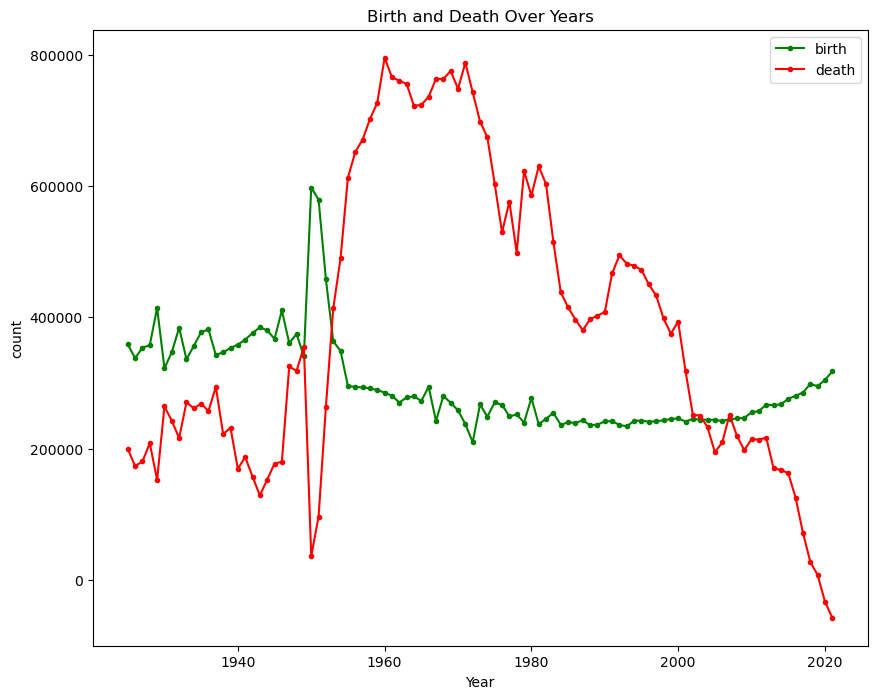

In [ ]:
#신생아수와 사망인구수 비교(점선)
plt.xlabel("Year");plt.ylabel("count");plt.title("Birth and Death Over Years")
plt.plot(df_bd.birth, "g.-", label='birth')
plt.plot(df_bd.death, "r.-", label='death')
plt.legend(loc='upper right')


plt.show()

In [ ]:
df_bbr = df[['birth', 'birthrate']]
df_bbr.dropna(inplace=True)


69
       birth  birthrate
Year                   
1925  558897      6.590
1930  587144      6.410
1935  646158      6.600
1940  527964      6.560
1944  533215      6.780
...      ...        ...
2017  357771      1.052
2018  326822      0.977
2019  303054      0.918
2020  272337      0.837
2021  260562      0.808

[69 rows x 2 columns]


C:\Users\302-26\AppData\Local\Temp\ipykernel_5800\1199606229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bbr.dropna(inplace=True)


In [ ]:
print(len(df_bbr)) #69행
print(df_bbr) 

69
       birth  birthrate
Year                   
1925  558897      6.590
1930  587144      6.410
1935  646158      6.600
1940  527964      6.560
1944  533215      6.780
...      ...        ...
2017  357771      1.052
2018  326822      0.977
2019  303054      0.918
2020  272337      0.837
2021  260562      0.808

[69 rows x 2 columns]


#신생아 - 출산율 그래프 (1)

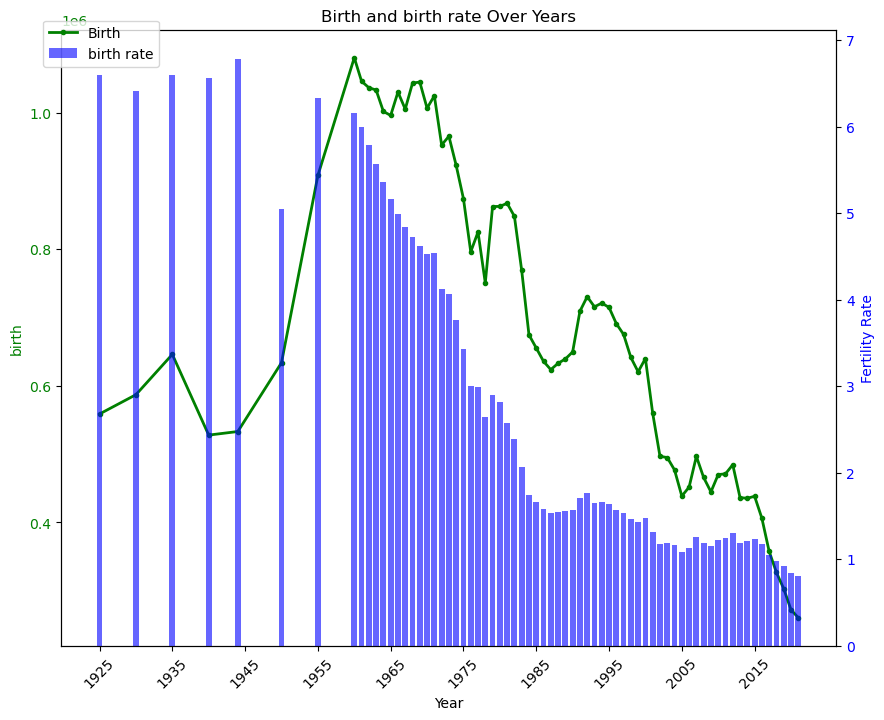

In [92]:
# 그래프 그리기
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# 신생아 수 점선 그래프
ax1.plot(df_bbr.index, df_bbr['birth'], "g.-", label='Birth' ,linewidth=2)
ax1.set_xlabel('Year')
ax1.set_ylabel('birth', color='g')
ax1.tick_params(axis='y', labelcolor='g')

#출산율 막대그래프
ax2.bar(df_bbr.index, df_bbr['birthrate'], alpha=0.6, label='birth rate', color='b')
ax2.set_ylabel('Fertility Rate', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# x축 눈금 간격 설정
years = np.arange(df_bbr.index.min(), df_bbr.index.max() + 1, 10)
ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation=45)

#타이틀, 범례 추가
plt.title('Birth and birth rate Over Years')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# 그래프 표시
plt.show()

#신생아 - 출산율 그래프 (2)
- 이게 훨씬 보기 좋음


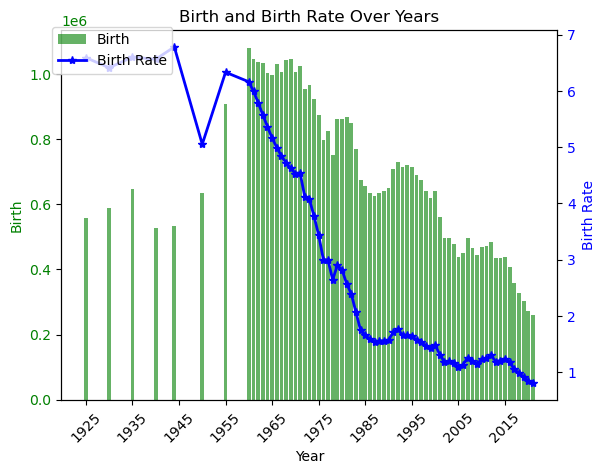

In [129]:
# 그래프 그리기
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# 신생아 수 막대 그래프
ax1.bar(df_bbr.index, df_bbr['birth'], alpha=0.6, label='Birth', color='g')
ax1.set_xlabel('Year')
ax1.set_ylabel('Birth', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# 출산율 점선 그래프
ax2.plot(df_bbr.index, df_bbr['birthrate'], "b*-", label='Birth Rate', linewidth=2)
ax2.set_ylabel('Birth Rate', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# x축 눈금 간격 설정
years = np.arange(df_bbr.index.min(), df_bbr.index.max() + 1, 10)
ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation=45)

# 타이틀, 범례 추가
plt.title('Birth and Birth Rate Over Years')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# 그래프 표시
plt.show()

#출산율 히스토그램

In [ ]:
df_bbr.max()
df_bbr.min()

birth        260562.000
birthrate         0.808
dtype: float64

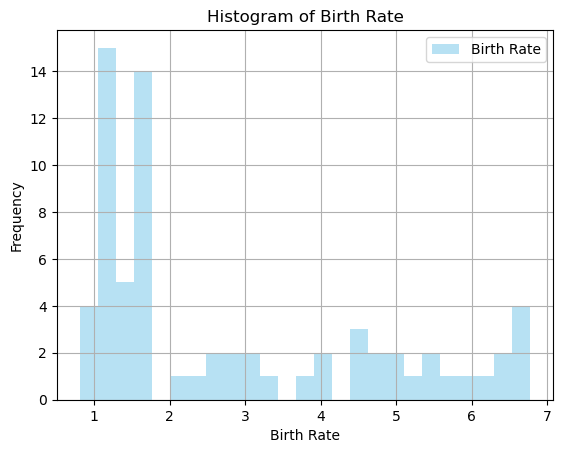

In [128]:
plt.figure()
plt.hist(df_bbr['birthrate'], bins=25, alpha=0.6, color='skyblue', label='Birth Rate')
plt.xlabel('Birth Rate')
plt.ylabel('Frequency') #빈도
plt.title('Histogram of Birth Rate')
plt.legend()
plt.grid(True)
plt.show()